<strong><b><font size="6">NLP_preprocessing_Lab1</font></b></strong>

#add your Name
<strong><b><font size="4">Name : BOUJBAIR OUSSAMAE</font></b></strong>

<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
  

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string
import numpy as np
import re

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews

In [4]:
len(movie_reviews.fileids())

2000

In [5]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [6]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [7]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [8]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [9]:
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [10]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [11]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [12]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [13]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [14]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


In [15]:
data.review[1]

'every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody\'s surprise ( perhaps even the studio ) the film becomes a critical darling . \nmtv films\' _election , a high school comedy starring matthew broderick and reese witherspoon , is a current example . \ndid anybody know this film existed a week before it opened ? \nthe plot is deceptively simple . \ngeorge washington carver high school is having student elections . \ntracy flick ( reese witherspoon ) is an over-achiever with her hand raised at nearly every question , way , way , high . \nmr . " m " ( matthew broderick ) , sick of the megalomaniac student , encourages paul , a popular-but-slow jock to run . \nand paul\'s nihilistic sister jumps in the race as well , for personal reasons . \nthe dark side of such sleeper success is that , because expectations were so low going in , the fact that this was quality stuff made the reviews even more enthusiastic tha

### Lower casing

In [16]:
data['review']= data['review'].apply(lambda x: x.lower())

In [17]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


### Remove punctuation

In [18]:
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit's overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out wh

In [19]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [20]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

data['review']= data['review'].apply(lambda x:remove_punctuation(x))



In [21]:
#verification
data.review[2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop = stopwords.words('english')

In [24]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
#here we have implemented a custom function that will split each word from the text and check whether it is a stopword or not.
#If not then pass as it is in string and if stopword then removes it.
data['review'] = data['review'].apply(lambda x: remove_stopwords(x))

In [27]:
#data['review']= data['review'].apply(lambda x:remove_stopwords(x))

In [28]:
#verification
data.review[2]

'youve got mail works alot better deserves order make film success cast two extremely popular attractive stars share screen two hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts good contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing films helmed woman havent quite yet figured liked much youve got mail really important like something much even question storyline cliched come tom hanks plays joe fox insanely likeable owner discount book chain meg ryan plays kathleen kelley even insanely likeable proprietor familyrun childrens book shop called nice homage shop around corner fox kelley soon become bitter rivals new fox books store opening right across block small business li

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Word Tokenizing:__

### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [30]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["review"] = data["review"].apply(lambda x: stem_words(x))

In [31]:
data["review"][3]

'jaw rare film grab attent show singl imag screen movi open black distant alienlik underwat sound come first omin bar compos john william infam score dahdum director steven spielberg wast time take us water midnight swim beauti girl turn deadli right away let us know vulner float ocean jaw attack never relinquish grip perhap outstand jaw spielberg build movi work like theatric product first act second act unlik mani modern filmmak great deal restraint refus show us shark middl second act mere suggest presenc creepi subject underwat shot william music he build tension bit bit come time climax shark arriv truli terrifi doesnt let us get bore imageri first act open polic chief martin brodi roy scheider new york cop taken easi peac job run polic station amiti island fictiti new england resort town hasnt murder gun fire 25 year island shaken sever viciou great white shark attack right fourth juli mayor larri vaughn murray hamilton doesnt want shut beach island reliant summer tourist money b

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["review"] = data["review"].apply(lambda text: lemmatize_words(text))

In [34]:
data["review"][3]

'jaw rare film grab attent show singl imag screen movi open black distant alienlik underwat sound come first omin bar compos john william infam score dahdum director steven spielberg wast time take u water midnight swim beauti girl turn deadli right away let u know vulner float ocean jaw attack never relinquish grip perhap outstand jaw spielberg build movi work like theatric product first act second act unlik mani modern filmmak great deal restraint refus show u shark middl second act mere suggest presenc creepi subject underwat shot william music he build tension bit bit come time climax shark arriv truli terrifi doesnt let u get bore imageri first act open polic chief martin brodi roy scheider new york cop taken easi peac job run polic station amiti island fictiti new england resort town hasnt murder gun fire 25 year island shaken sever viciou great white shark attack right fourth juli mayor larri vaughn murray hamilton doesnt want shut beach island reliant summer tourist money brodi

__Bag of Words using CountVectorizer:__


In [35]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
corpus=data["review"]
count_vector = CountVectorizer() 

In [36]:
X = count_vector.fit_transform(corpus).toarray()
word_count = count_vector.get_feature_names()
print(word_count)

['00', '000', '0009f', '000acr', '000aweek', '000foot', '000paltri', '007', '007esqu', '010', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '100minut', '101', '1010', '101yearold', '102', '102minut', '103', '103196', '103minut', '104minut', '105', '105minut', '106', '106minut', '107', '107yearold', '108', '109', '10a', '10day', '10foot', '10minut', '10stori', '10th', '10week', '10year', '10yearold', '11', '110', '111', '111900', '112', '112097', '113', '1138', '114', '115', '117', '118', '11stori', '11thhour', '11year', '11yearold', '12', '120th', '121', '122', '123', '125', '125th', '126', '127', '1272', '128', '129', '1298', '12997', '12finger', '12hour', '12minut', '12part', '12step', '12th', '12year', '12yearold', '13', '130', '1305', '131', '132', '1320', '133', '135', '137', '138', '139', '13th', '13week', '13yearold', '14', '140', '1400', '143', '144', '14th', '14year', '14yearold', '15', '150', '1500', '150th', '151', '1516', '152', '1521', '1524', '153', '15

### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important. 
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [37]:
doc_array =  count_vector.fit_transform(corpus).toarray()

frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names())
frequency_matrix

,00,000,0009f,000acr,000aweek,000foot,000paltri,007,007esqu,010,...,zuehlk,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest = train_test_split(data,train_size=0.8,random_state=1,stratify=data['label'])

In [39]:
dataTrain

,review,label
1957,recent one night young director name baz luhrm...,neg
1800,four movi earn jami lee curti titl scream quee...,neg
1956,godzilla ultim culmin care plot summer movi lo...,neg
752,youv probabl heard one priest rabbi never dosa...,pos
1525,one indic bad film hype rememb film case box h...,neg
...,...,...
1499,best thing fact good thing say dark citi made ...,neg
1211,tim robbin martin lawernc team road movi comed...,neg
852,selfproclaim profession film critic somewhat e...,pos
544,matter suspect isnt usual action thriller usua...,pos


In [40]:
dataTrain.groupby(['label']).size()

label
neg    800
pos    800
dtype: int64

In [41]:
dataTest.groupby(['label']).size()

label
neg    200
pos    200
dtype: int64

In [42]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(binary=True)

#create the document term matrix
XTrain = parseur.fit_transform(dataTrain['review'])

In [43]:
XTrain

<1600x28690 sparse matrix of type '<class 'numpy.int64'>'
	with 405933 stored elements in Compressed Sparse Row format>

In [44]:
#list of tokens
print(parseur.get_feature_names())

['00', '000', '0009f', '000acr', '000aweek', '000paltri', '007', '007esqu', '010', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '100minut', '101', '1010', '102', '102minut', '103', '103196', '103minut', '104minut', '105', '105minut', '106', '107', '107yearold', '108', '10a', '10foot', '10minut', '10stori', '10th', '10week', '10year', '10yearold', '11', '110', '111', '111900', '112', '112097', '113', '1138', '115', '118', '11stori', '11thhour', '11year', '11yearold', '12', '121', '122', '123', '125', '125th', '126', '127', '128', '129', '12997', '12finger', '12hour', '12minut', '12part', '12step', '12th', '12year', '12yearold', '13', '130', '131', '132', '1320', '135', '137', '138', '139', '13th', '13week', '14', '143', '144', '14th', '14year', '14yearold', '15', '150', '1500', '150th', '151', '1516', '152', '1524', '153', '155', '1554', '1583', '1590', '15foot', '15milliondollar', '15minut', '15th', '15week', '15year', '15yearold', '16', '160', '1600', '161', '1617'

In [45]:
#number of  tokens
print(len(parseur.get_feature_names()))

28690


In [46]:
#transform the sparse matrix into a numpy matrix
mdtTrain = XTrain.toarray()

#type of the matrix
print(type(mdtTrain))

#size of the matrix
print(mdtTrain.shape)

<class 'numpy.ndarray'>
(1600, 28690)


In [47]:
mdtTrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
#frequency of the terms
freq_mots = np.sum(mdtTrain,axis=0)#sum since we are using binary ponderation
print(freq_mots)
print('****')
#argmax
index = np.argsort(freq_mots)
print(index)
print('****')
#print the terms and their frequency
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pd.DataFrame(imp).sort_values(by='freq', ascending=False))

[ 5 66  1 ...  6  1  1]
****
[14344 15571 15573 ... 16495 17770  8996]
****
               terme  freq
28689           film  1437
28688            one  1406
28687           movi  1307
28686           like  1216
28685           make  1141
...              ...   ...
8695         sadoski     1
8694         salieri     1
8693        salinger     1
8692           saliv     1
0      lessthanhonor     1

[28690 rows x 2 columns]


In [49]:
#frequency distribution of the class attribute
print(pd.crosstab(index=data["label"],columns="count"))

col_0  count
label       
neg     1000
pos     1000


In [50]:
data

,review,label
0,film adapt comic book plenti success whether t...,pos
1,everi movi come along suspect studio everi ind...,pos
2,youv got mail work alot better deserv order ma...,pos
3,jaw rare film grab attent show singl imag scre...,pos
4,moviemak lot like gener manag nfl team postsal...,pos
...,...,...
1995,anyth stigma taken warn releas similarlythem f...,neg
1996,john boorman zardoz goofi cinemat debacl funda...,neg
1997,kid hall acquir tast took least season watch s...,neg
1998,time john carpent great horror director cours ...,neg


# Create test and training 

In [51]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest = train_test_split(data,train_size=0.8,random_state=1,stratify=data['label'])

In [52]:
dataTrain

,review,label
1957,recent one night young director name baz luhrm...,neg
1800,four movi earn jami lee curti titl scream quee...,neg
1956,godzilla ultim culmin care plot summer movi lo...,neg
752,youv probabl heard one priest rabbi never dosa...,pos
1525,one indic bad film hype rememb film case box h...,neg
...,...,...
1499,best thing fact good thing say dark citi made ...,neg
1211,tim robbin martin lawernc team road movi comed...,neg
852,selfproclaim profession film critic somewhat e...,pos
544,matter suspect isnt usual action thriller usua...,pos


In [53]:
dataTrain.groupby(['label']).size()

label
neg    800
pos    800
dtype: int64

In [54]:
dataTest.groupby(['label']).size()

label
neg    200
pos    200
dtype: int64

# Generate the document term matrix - train set

In [55]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(binary=True)

#create the document term matrix
XTrain = parseur.fit_transform(dataTrain['review'])

In [56]:
XTrain

<1600x28690 sparse matrix of type '<class 'numpy.int64'>'
	with 405933 stored elements in Compressed Sparse Row format>

In [57]:
#list of tokens
print(parseur.get_feature_names())

['00', '000', '0009f', '000acr', '000aweek', '000paltri', '007', '007esqu', '010', '03', '04', '05', '05425', '10', '100', '1000', '10000', '100m', '100minut', '101', '1010', '102', '102minut', '103', '103196', '103minut', '104minut', '105', '105minut', '106', '107', '107yearold', '108', '10a', '10foot', '10minut', '10stori', '10th', '10week', '10year', '10yearold', '11', '110', '111', '111900', '112', '112097', '113', '1138', '115', '118', '11stori', '11thhour', '11year', '11yearold', '12', '121', '122', '123', '125', '125th', '126', '127', '128', '129', '12997', '12finger', '12hour', '12minut', '12part', '12step', '12th', '12year', '12yearold', '13', '130', '131', '132', '1320', '135', '137', '138', '139', '13th', '13week', '14', '143', '144', '14th', '14year', '14yearold', '15', '150', '1500', '150th', '151', '1516', '152', '1524', '153', '155', '1554', '1583', '1590', '15foot', '15milliondollar', '15minut', '15th', '15week', '15year', '15yearold', '16', '160', '1600', '161', '1617'

In [58]:
#number of  tokens
print(len(parseur.get_feature_names()))

28690


In [59]:
#transform the sparse matrix into a numpy matrix
mdtTrain = XTrain.toarray()

#type of the matrix
print(type(mdtTrain))

#size of the matrix
print(mdtTrain.shape)

<class 'numpy.ndarray'>
(1600, 28690)


In [60]:
mdtTrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
#frequency of the terms
freq_mots = np.sum(mdtTrain,axis=0)#sum since we are using binary ponderation
print(freq_mots)
print('****')
#argmax
index = np.argsort(freq_mots)
print(index)
print('****')
#print the terms and their frequency
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pd.DataFrame(imp).sort_values(by='freq', ascending=False))

[ 5 66  1 ...  6  1  1]
****
[14344 15571 15573 ... 16495 17770  8996]
****
               terme  freq
28689           film  1437
28688            one  1406
28687           movi  1307
28686           like  1216
28685           make  1141
...              ...   ...
8695         sadoski     1
8694         salieri     1
8693        salinger     1
8692           saliv     1
0      lessthanhonor     1

[28690 rows x 2 columns]


#  Réduction de dimensionnalité 1 –  fréquence des termes


In [62]:
#***** MIN FREQUENCY

#rebuild the parser with new options : min_df = 10
parseurBis = CountVectorizer(stop_words='english',binary=True, min_df = 10)
XTrainBis = parseurBis.fit_transform(dataTrain['review'])

#number of tokens
print(len(parseurBis.get_feature_names()))

#mdt_bis
mdtTrainBis = XTrainBis.toarray()

5297


# train the classifier

KNN classifier

In [63]:
#import the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#instatiate the object
knn_classifier = KNeighborsClassifier(n_neighbors=2)

#perform the training process
knn_classifier.fit(mdtTrainBis,dataTrain['label'])


KNeighborsClassifier(n_neighbors=2)

In [64]:
#generate the document term matrix for the test set
#using the object learned from the train set
#import the metrics class for the performance measurement
from sklearn import metrics

#create the document term matrix
mdtTestBis = parseurBis.transform(dataTest['review'])

#prediction for the test set
predTestBis = knn_classifier.predict(mdtTestBis)

#confusion matrix
print('***Confusion matrix')
mcTestBis = metrics.confusion_matrix(dataTest['label'],predTestBis)
print(mcTestBis)

***Confusion matrix
[[200   0]
 [199   1]]


In [65]:
#recall
print('Recall')
print(metrics.recall_score(dataTest['label'],predTestBis,pos_label='pos'))

#precision
print('precision')
print(metrics.precision_score(dataTest['label'],predTestBis,pos_label='pos'))

#F1-Score
print('F1-Score')
print(metrics.f1_score(dataTest['label'],predTestBis,pos_label='pos'))

#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(dataTest['label'],predTestBis))

Recall
0.005
precision
1.0
F1-Score
0.009950248756218907
accuracy rate -->
0.5025


# LogistiRegression

In [66]:
#*** train the classifier

#import the class LogistiRegression
from sklearn.linear_model import LogisticRegression

#instatiate the object
modelBis = LogisticRegression()

#perform the training process
modelBis.fit(mdtTrainBis,dataTrain['label'])

#generate the document term matrix for the test set
#using the object learned from the train set


#import the metrics class for the performance measurement
#from sklearn import metrics

#create the document term matrix for test
mdtTestBis = parseurBis.transform(dataTest['review'])

#prediction for the test set
predTestBis = modelBis.predict(mdtTestBis)

#confusion matrix
print('***Confusion matrix')
mcTestBis = metrics.confusion_matrix(dataTest['label'],predTestBis)
print(mcTestBis)

#recall
print('Recall')
print(metrics.recall_score(dataTest['label'],predTestBis,pos_label='pos'))

#precision
print('precision')
print(metrics.precision_score(dataTest['label'],predTestBis,pos_label='pos'))

#F1-Score
print('F1-Score')
print(metrics.f1_score(dataTest['label'],predTestBis,pos_label='pos'))

#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(dataTest['label'],predTestBis))

***Confusion matrix
[[175  25]
 [ 34 166]]
Recall
0.83
precision
0.8691099476439791
F1-Score
0.8491048593350383
accuracy rate -->
0.8525


# Réduction de dimensionnalité 2 – Post traitement du modèle

In [67]:
modelBis.coef_

array([[ 0.06206667, -0.33952612,  0.08230161, ..., -0.07115407,
        -0.15315875,  0.04320377]])

In [68]:
#***** REMOVE TERMS WITH COEFFICIENTS NEARLY ZERO
#Tout d’abord il nous faut caractériser les coefficients du modèle. Nous les passons en valeur absolue et nous calculons plusieurs quantiles.

#absolute  value of the coefficients
coef_abs = np.abs(modelBis.coef_[0,:])

coef_abs

array([0.06206667, 0.33952612, 0.08230161, ..., 0.07115407, 0.15315875,
       0.04320377])

In [69]:
#percentiles of the coefficients (absolute value)
thresholds = np.percentile(coef_abs,[0,25,50,75,90,100])
print(thresholds)

[6.55576576e-05 3.52320596e-02 7.58015964e-02 1.36821847e-01
 2.19041921e-01 1.00606464e+00]


In [70]:
#identify the coefficients "significantly higher than zero
#use 1st quartile as threshold
indices = np.where(coef_abs > thresholds[2])
print(len(indices[0]))

2648


In [71]:
#create the new document term matrices

#document term matrices - train and test sets
mdtTrainTer = mdtTrainBis[:,indices[0]]#toutes les lignes et uniquement les colones 
mdtTestTer = mdtTestBis[:,indices[0]]

#checking
print(mdtTrainTer.shape)
print(mdtTestTer.shape)

(1600, 2648)
(400, 2648)


In [72]:
#instatiate the object
modelTer = LogisticRegression()

#train a new classifier with selected terms
modelTer.fit(mdtTrainTer,dataTrain['label'])

#prediction on the test set
predTestTer = modelTer.predict(mdtTestTer)

#confusion matrix
mcTestTer = metrics.confusion_matrix(dataTest['label'],predTestTer)
print(mcTestTer)

[[172  28]
 [ 31 169]]


In [73]:
#selected terms
sel_terms = np.array(parseurBis.get_feature_names())[indices[0]]

#sorted indices of the absolute value coefficients
sorted_indices = np.argsort(np.abs(modelTer.coef_[0,:]))

#print the terms and theirs coefficients
imp = {'term':np.asarray(sel_terms)[sorted_indices],'coef':modelTer.coef_[0,:][sorted_indices]}
#Les 10 termes les plus discriminants dans le modèle sont (avec les coefficients associés) :
print(pd.DataFrame(imp).sort_values(by='coef', ascending=False).head(10))

         term      coef
2642    thank  0.725999
2641  surpris  0.724084
2639   hilari  0.706585
2635    enjoy  0.654845
2633      fun  0.646761
2631    excel  0.625716
2630  sometim  0.625057
2629    great  0.618531
2628     flaw  0.618271
2626     town  0.614072


#  deployment

In [74]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [75]:
#document to classify
doc = ['this is a new free service for you only']

#document preprocessing
doc=expand_contractions(str(doc))
doc = str(doc).lower()
doc = re.sub('[%s]' % re.escape(string.punctuation), '' , str(doc))
doc = re.sub('[%s]' % re.escape(string.punctuation), '' ,  str(doc))
doc =re.sub(r'\b[0-9]+\b\s*', '', str(doc))
doc = remove_stopwords(str(doc))

#get its description
desc = parseurBis.transform([doc])
print(desc)

  (0, 1906)	1
  (0, 3177)	1


In [76]:
doc = ["Hello Boujbair.oussamae, You are customer #0836901 by Amazon Rewards and we have been waiting for your confirmation since. This delivery is for boujbair.oussamae To activate delivery, validate here! Cordially,, Amazon reward"]
#document preprocessing
doc=expand_contractions(str(doc))
doc = str(doc).lower()
doc = re.sub('[%s]' % re.escape(string.punctuation), '' , str(doc))
doc =re.sub(r'\b[0-9]+\b\s*', '', str(doc))
doc = remove_stopwords(str(doc))

#get its description
desc = parseurBis.transform([doc])
print(desc)

  (0, 3941)	1


In [77]:
doc

'hello boujbairoussamae customer amazon rewards waiting confirmation since delivery boujbairoussamae activate delivery validate cordially amazon reward'

In [78]:
#which terms
print(np.asarray(parseurBis.get_feature_names())[desc.indices])

['reward']


In [79]:
#dense representation
dense_desc = desc.toarray()

#apply var. selection
dense_sel = dense_desc[:,indices[0]]

In [80]:
dense_desc 

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
#prediction of the class membership
pred_doc = modelTer.predict(dense_sel)
print(pred_doc)

['neg']


In [82]:
#prediction of the class membership probabilities
pred_proba = modelTer.predict_proba(dense_sel)
print(pred_proba)

[[0.73632562 0.26367438]]


L’appartenance du message à la classe ‘neg’ avec une probabilité d’appartenance égale à 0.73.

In [83]:
data

,review,label
0,film adapt comic book plenti success whether t...,pos
1,everi movi come along suspect studio everi ind...,pos
2,youv got mail work alot better deserv order ma...,pos
3,jaw rare film grab attent show singl imag scre...,pos
4,moviemak lot like gener manag nfl team postsal...,pos
...,...,...
1995,anyth stigma taken warn releas similarlythem f...,neg
1996,john boorman zardoz goofi cinemat debacl funda...,neg
1997,kid hall acquir tast took least season watch s...,neg
1998,time john carpent great horror director cours ...,neg


In [84]:
data.drop('label', inplace=True, axis=1)

In [85]:
data

,review
0,film adapt comic book plenti success whether t...
1,everi movi come along suspect studio everi ind...
2,youv got mail work alot better deserv order ma...
3,jaw rare film grab attent show singl imag scre...
4,moviemak lot like gener manag nfl team postsal...
...,...
1995,anyth stigma taken warn releas similarlythem f...
1996,john boorman zardoz goofi cinemat debacl funda...
1997,kid hall acquir tast took least season watch s...
1998,time john carpent great horror director cours ...


In [86]:
print(data.head())

                                              review
0  film adapt comic book plenti success whether t...
1  everi movi come along suspect studio everi ind...
2  youv got mail work alot better deserv order ma...
3  jaw rare film grab attent show singl imag scre...
4  moviemak lot like gener manag nfl team postsal...


# Clean the Data

In [88]:
data = data[:100]
tokenized_doc = data['review'].str.replace("[^a-zA-Z#]", " ")
data.shape

(100, 1)

In [89]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text;

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     film adapt comic book plenti success whether t...
1     everi movi come along suspect studio everi ind...
2     youv mail work alot better deserv order make f...
3     rare film grab attent show singl imag screen m...
4     moviemak like gener manag team postsalari youv...
                            ...                        
95    crazybeauti suffer damnedifyoudo damnedifyoudo...
96    everyon know someon like gile death stuffi arr...
97    mani peopl procrastin isnt problem overcom hig...
98    meet black review star brad pitt anthoni hopki...
99    call touch demon gregori hoblit fallen serial ...
Name: review, Length: 100, dtype: object

Handling the Stop-words and Punctuation-->Lemmatization

In [91]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from string import punctuation
  
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

# Initializing wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

doc_clean = tokenized_doc.apply(lemData)
doc_clean

0     film adapt comic book plenti success whether t...
1     everi movi come along suspect studio everi ind...
2     youv mail work alot better deserv order make f...
3     rare film grab attent show singl imag screen m...
4     moviemak like gener manag team postsalari youv...
                            ...                        
95    crazybeauti suffer damnedifyoudo damnedifyoudo...
96    everyon know someon like gile death stuffi arr...
97    mani peopl procrastin isnt problem overcom hig...
98    meet black review star brad pitt anthoni hopki...
99    call touch demon gregori hoblit fallen serial ...
Name: review, Length: 100, dtype: object

In [92]:
# Creating a list of documents from the complaints column
list_of_docs = doc_clean.tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [doc.split() for doc in list_of_docs]

In [93]:
doc_clean

[['film',
  'adapt',
  'comic',
  'book',
  'plenti',
  'success',
  'whether',
  'theyr',
  'superhero',
  'batman',
  'superman',
  'spawn',
  'gear',
  'toward',
  'casper',
  'arthous',
  'crowd',
  'ghost',
  'world',
  'never',
  'realli',
  'comic',
  'book',
  'like',
  'hell',
  'starter',
  'creat',
  'alan',
  'moor',
  'eddi',
  'campbel',
  'brought',
  'medium',
  'whole',
  'level',
  'part',
  'seri',
  'call',
  'watchman',
  'moor',
  'campbel',
  'thoroughli',
  'research',
  'jack',
  'ripper',
  'would',
  'like',
  'michael',
  'jackson',
  'start',
  'look',
  'littl',
  'book',
  'graphic',
  'novel',
  'page',
  'long',
  'includ',
  'nearli',
  'consist',
  'noth',
  'footnot',
  'word',
  'dont',
  'dismiss',
  'film',
  'sourc',
  'past',
  'whole',
  'comic',
  'book',
  'thing',
  'might',
  'find',
  'anoth',
  'stumbl',
  'block',
  'hell',
  'director',
  'albert',
  'allen',
  'hugh',
  'hugh',
  'brother',
  'direct',
  'seem',
  'almost',
  'ludicr',

# LDA

In [94]:
import gensim


from gensim import corpora
import string
from gensim.models.ldamodel import LdaModel

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5,id2word=dictionary, random_state=20, passes=30)

In [95]:
from pprint import pprint
# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.009*"film" + 0.007*"movi" + 0.004*"like" + 0.004*"charact" + 0.004*"play" '
  '+ 0.004*"life" + 0.004*"perform" + 0.004*"take" + 0.003*"come" + '
  '0.003*"also"'),
 (1,
  '0.012*"film" + 0.005*"charact" + 0.005*"shark" + 0.005*"gile" + '
  '0.004*"movi" + 0.004*"like" + 0.004*"tibb" + 0.004*"howev" + 0.004*"play" + '
  '0.004*"show"'),
 (2,
  '0.020*"film" + 0.007*"charact" + 0.007*"movi" + 0.006*"like" + 0.006*"make" '
  '+ 0.004*"time" + 0.004*"look" + 0.004*"also" + 0.003*"stori" + '
  '0.003*"good"'),
 (3,
  '0.014*"film" + 0.009*"movi" + 0.005*"charact" + 0.005*"like" + '
  '0.004*"alien" + 0.004*"time" + 0.004*"make" + 0.004*"good" + 0.004*"much" + '
  '0.003*"scene"'),
 (4,
  '0.017*"film" + 0.008*"movi" + 0.006*"like" + 0.005*"charact" + 0.005*"make" '
  '+ 0.005*"star" + 0.004*"also" + 0.004*"time" + 0.004*"good" + '
  '0.004*"jacki"')]


# LDA on TFIDF vectoriser

In [96]:
from gensim import models
# train the model
tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

In [97]:
# Creating the LDA model
ldamodel = LdaModel(corpus=corpus_tfidf, num_topics=5,id2word=dictionary, random_state=20, passes=30)

# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.001*"giant" + 0.001*"mulan" + 0.000*"hank" + 0.000*"memento" + '
  '0.000*"lumumba" + 0.000*"pitt" + 0.000*"angel" + 0.000*"tampopo" + '
  '0.000*"jerri" + 0.000*"finn"'),
 (1,
  '0.001*"gile" + 0.001*"shark" + 0.001*"zero" + 0.000*"cole" + 0.000*"harri" '
  '+ 0.000*"spoon" + 0.000*"doctor" + 0.000*"kelli" + 0.000*"argento" + '
  '0.000*"chan"'),
 (2,
  '0.001*"shrek" + 0.001*"lumumba" + 0.001*"negoti" + 0.000*"lambeau" + '
  '0.000*"dogma" + 0.000*"unzip" + 0.000*"davi" + 0.000*"goodman" + '
  '0.000*"derek" + 0.000*"mizrahi"'),
 (3,
  '0.001*"franci" + 0.001*"tibb" + 0.001*"alien" + 0.001*"vampir" + '
  '0.001*"monkey" + 0.000*"john" + 0.000*"elect" + 0.000*"alda" + '
  '0.000*"blade" + 0.000*"travolta"'),
 (4,
  '0.001*"bulworth" + 0.001*"bobbi" + 0.001*"roger" + 0.001*"stahl" + '
  '0.000*"stephan" + 0.000*"homer" + 0.000*"cabl" + 0.000*"kevin" + '
  '0.000*"baku" + 0.000*"jacki"')]


# Evaluation Metric

In [98]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score
#Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7256390107332291


# Best K topics

In [99]:
def compute_coherence_values(dictionary, corpus, texts, limit, step, start=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [100]:
#To DO 
#plot coherence distribution and choose best k
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=2, limit=10, step=1)


In [101]:
coherence_values

[0.48429019587058686,
 0.6335404804324098,
 0.6834275530196641,
 0.6979577511518931,
 0.7000994825320027,
 0.676230731399443,
 0.6431021258116749,
 0.6433112674691065]

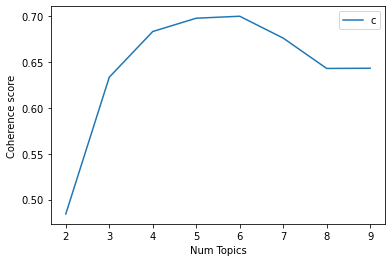

In [102]:
# Show graph
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# pyLDAvis Visualization

In [103]:
#!pip install pyLDAvis.gensim


import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()#enable automatic D3 display of prepared model data in the IPython notebook.

vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.006968  0.000199       1        1  27.791004
4      0.000892 -0.001305       2        1  21.380318
0      0.002807  0.005640       3        1  20.399861
1      0.002932 -0.004527       4        1  19.571676
2      0.000337 -0.000006       5        1  10.857141, topic_info=         Term      Freq     Total Category  logprob  loglift
1111  lumumba  7.000000  7.000000  Default  30.0000  30.0000
5146    shrek  5.000000  5.000000  Default  29.0000  29.0000
4285  lambeau  5.000000  5.000000  Default  28.0000  28.0000
2097   negoti  5.000000  5.000000  Default  27.0000  27.0000
3400    dogma  5.000000  5.000000  Default  26.0000  26.0000
...       ...       ...       ...      ...      ...      ...
3632    vader  1.055224  5.288416   Topic5  -8.0799   0.6086
1157   return  1.163395  6.668639   Topic5  -7.9823   0.4743
312    comedi  1.142665  7.266025   Topic5  -8.0003   0.3705
1515   action  1.143534  8.325115   Topic5  -7.9995   0.2352
1846     emot  1.049623  6.750509   Topic5  -8.0852   0.3592

[212 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1515      1  0.360355   action
1515      2  0.240237   action
1515      3  0.120118   action
1515      4  0.120118   action
1515      5  0.120118   action
...     ...       ...      ...
2167      5  0.148985     zero
3881      1  0.475289  zooland
3881      2  0.158430  zooland
3881      3  0.158430  zooland
3881      4  0.158430  zooland

[780 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 2, 3])

# FIN